In [48]:
import pandas as pd

# Load the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')

# Display the first few rows of the dataset
print(df.head())


       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [49]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from transformers import DistilBertTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Text Cleaning
def clean_text(text):
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

df['Resume'] = df['Resume'].apply(clean_text)

# Tokenization using DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_with_huggingface(text):
    tokens = tokenizer.tokenize(text)
    return tokens

df['Tokens_HuggingFace'] = df['Resume'].apply(tokenize_with_huggingface)

# Removal of Stop Words
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df['No_Stop_Words'] = df['Tokens_HuggingFace'].apply(remove_stopwords)

# Lemmatization and Stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

def stem_text(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Lemmatized_Resume'] = df['No_Stop_Words'].apply(lemmatize_text)
df['Stemmed_Resume'] = df['No_Stop_Words'].apply(stem_text)

# Feature Extraction using TF-IDF
df['Processed_Resume'] = df['Lemmatized_Resume'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Resume'])

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zeese\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeese\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zeese\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\zeese\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Accuracy of KNN model: 98.45%


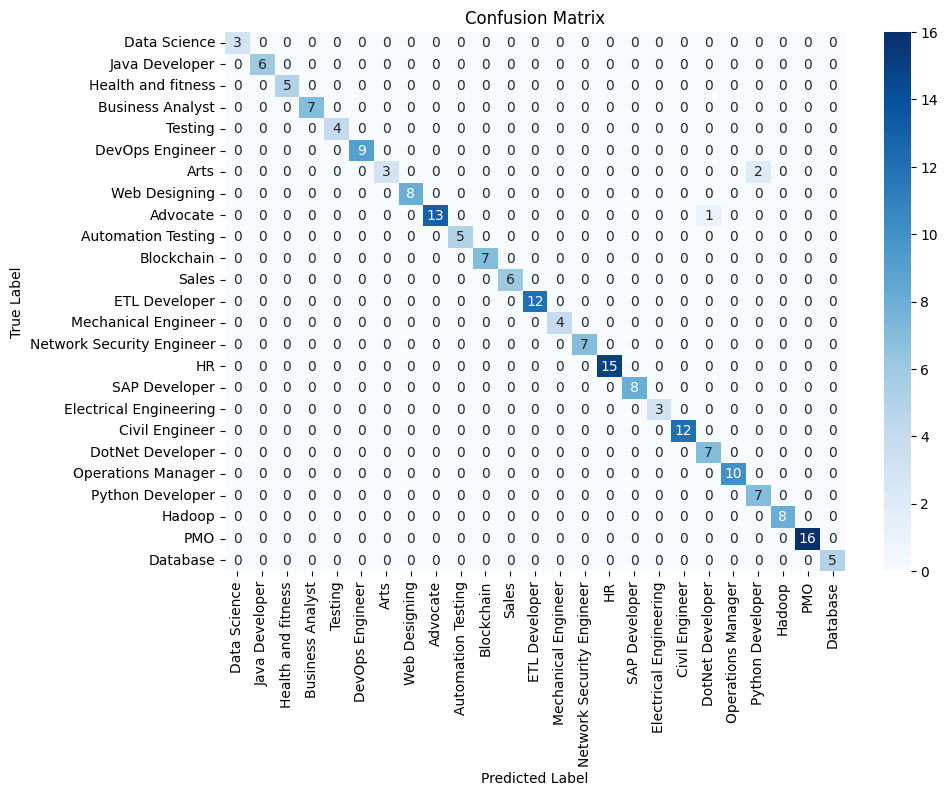

                           precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         3
           Java Developer       1.00      1.00      1.00         6
       Health and fitness       1.00      1.00      1.00         5
         Business Analyst       1.00      1.00      1.00         7
                  Testing       1.00      1.00      1.00         4
          DevOps Engineer       1.00      1.00      1.00         9
                     Arts       1.00      0.60      0.75         5
            Web Designing       1.00      1.00      1.00         8
                 Advocate       1.00      0.93      0.96        14
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
                    Sales       1.00      1.00      1.00         6
            ETL Developer       1.00      1.00      1.00        12
      Mechanical Engineer       1.00      1.00      1.00     

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the KNN model using KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")

# Evaluate performance
conf_matrix = confusion_matrix(y_test, predictions)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test, predictions, target_names=set(y_test))
print(report)


In [51]:
# Example input text
input_text = """Experienced data analyst with a background in big data, machine learning, and Python programming.
Skilled in data visualization using tools like Tableau and Power BI, as well as data wrangling and cleaning with Pandas and NumPy.
Proficient in SQL for querying databases and extracting insights.
Have worked on predictive modeling and statistical analysis to support business decision-making.
Seeking a challenging role as a Data Scientist to further develop my skills in artificial intelligence and machine learning."""

# Transform the input text to the TF-IDF feature space
input_tfidf = vectorizer.transform([input_text])

# Make predictions using the KNN model
distances, indices = knn_model.kneighbors(input_tfidf)

# Extract the predicted labels based on indices
predicted_labels = [y_train.iloc[index] for index in indices[0]]

# Convert predictions to a more understandable format
predicted_labels_flat = [label for label in predicted_labels]

# Print the predicted category
print(f"Predicted job category for the input text: {predicted_labels_flat[0]}")


Predicted job category for the input text: Data Science


Accuracy: 0.99
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hado

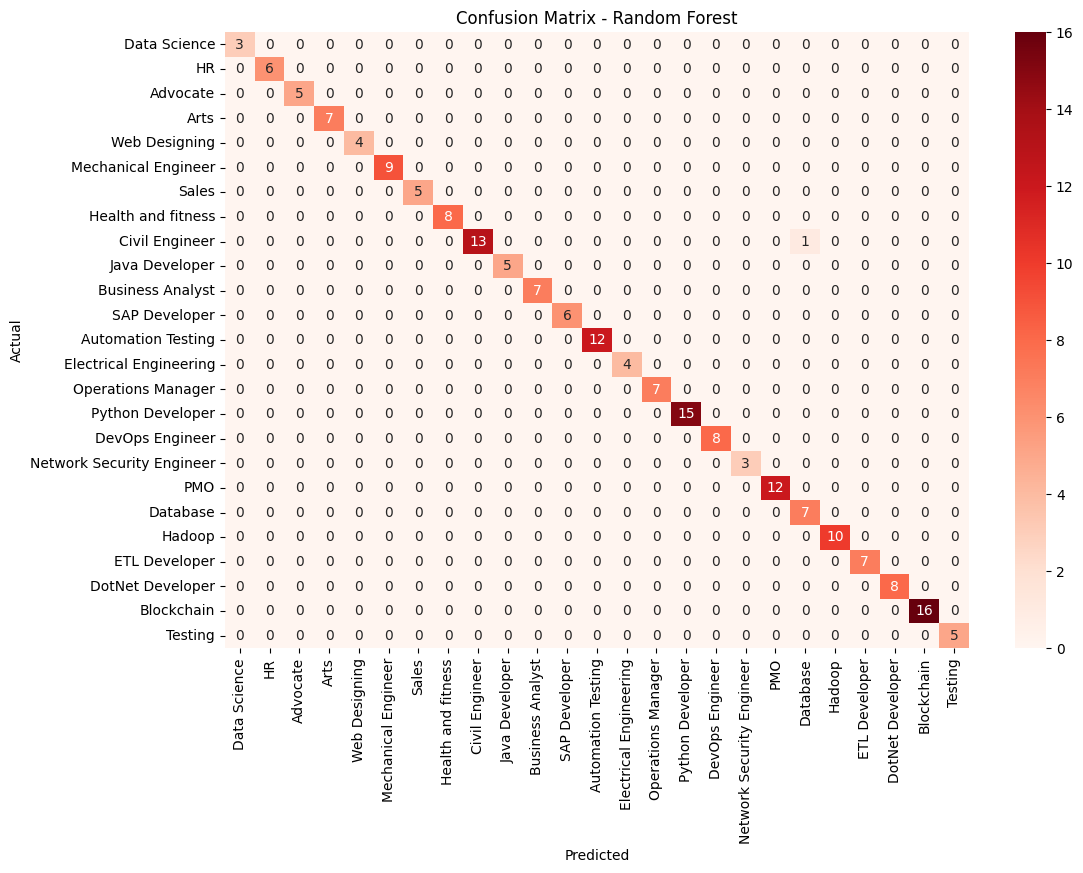

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [53]:
# Example input text
input_text = """Experienced data analyst with a background in big data, machine learning, and Python programming.
Skilled in data visualization using tools like Tableau and Power BI, as well as data wrangling and cleaning with Pandas and NumPy.
Proficient in SQL for querying databases and extracting insights.
Have worked on predictive modeling and statistical analysis to support business decision-making.
Seeking a challenging role as a Data Scientist to further develop my skills in artificial intelligence and machine learning."""

# Transform the input text to the TF-IDF feature space
input_tfidf = vectorizer.transform([input_text])

# Make predictions using the Random Forest model
predicted_category = rf_model.predict(input_tfidf)

# Print the predicted category
print(f"Predicted job category for the input text: {predicted_category[0]}")


Predicted job category for the input text: Data Science


Accuracy: 1.00
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      1.00      1.00        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hado

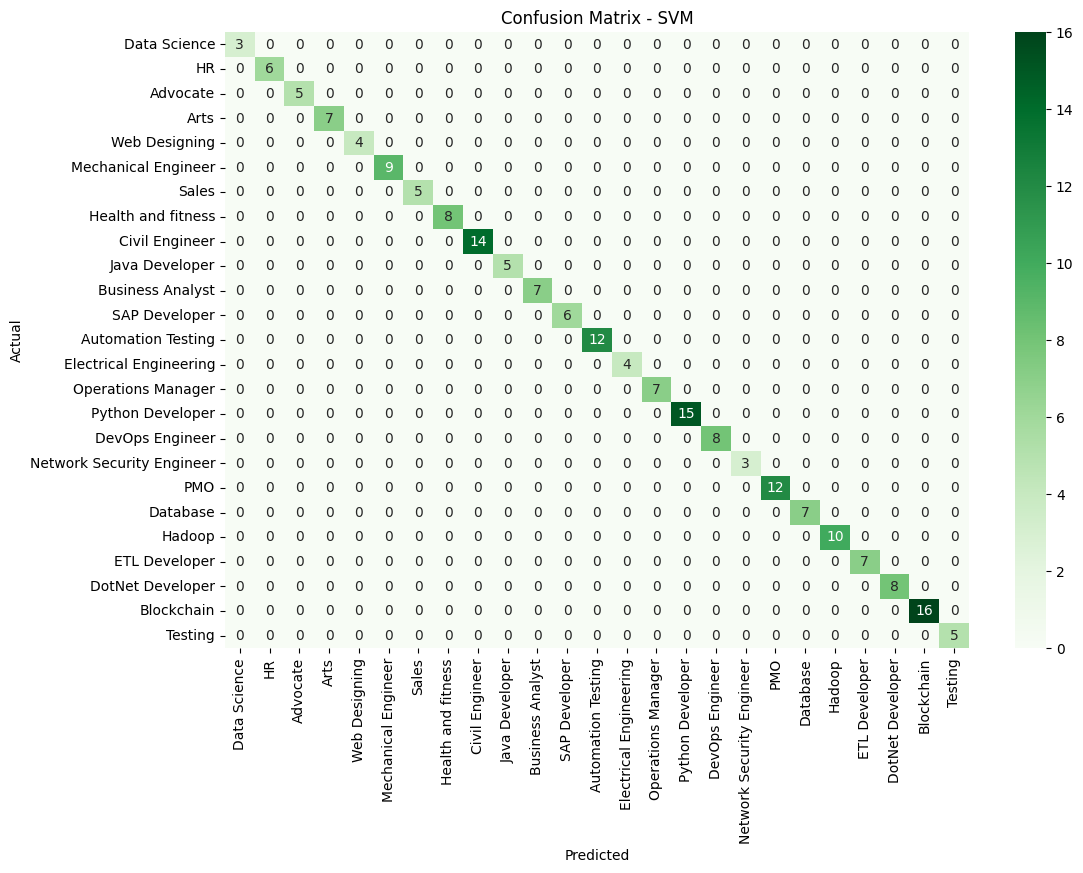

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()


In [55]:
# Example input text
input_text = """Experienced data analyst with a background in big data, machine learning, and Python programming.
Skilled in data visualization using tools like Tableau and Power BI, as well as data wrangling and cleaning with Pandas and NumPy.
Proficient in SQL for querying databases and extracting insights.
Have worked on predictive modeling and statistical analysis to support business decision-making.
Seeking a challenging role as a Data Scientist to further develop my skills in artificial intelligence and machine learning."""

# Transform the input text to the TF-IDF feature space
input_tfidf = vectorizer.transform([input_text])

# Make predictions using the SVM model
predicted_category = svm_model.predict(input_tfidf)

# Print the predicted category
print(f"Predicted job category for the input text: {predicted_category[0]}")


Predicted job category for the input text: Data Science


Accuracy: 0.99
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hado

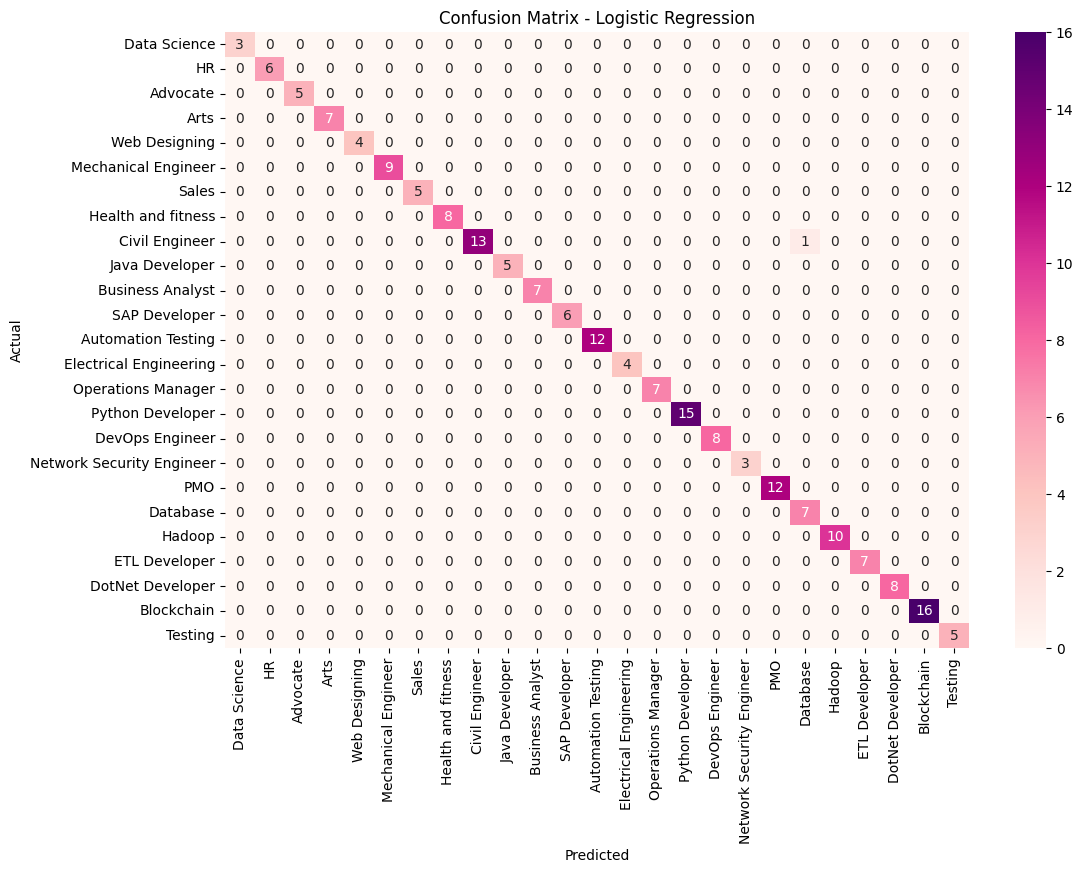

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [57]:
# Example input text
input_text = """Experienced data analyst with a background in big data, machine learning, and Python programming.
Skilled in data visualization using tools like Tableau and Power BI, as well as data wrangling and cleaning with Pandas and NumPy.
Proficient in SQL for querying databases and extracting insights.
Have worked on predictive modeling and statistical analysis to support business decision-making.
Seeking a challenging role as a Data Scientist to further develop my skills in artificial intelligence and machine learning."""

# Transform the input text to the TF-IDF feature space
input_tfidf = vectorizer.transform([input_text])

# Make predictions using the Logistic Regression model
predicted_category = log_reg_model.predict(input_tfidf)

# Print the predicted category
print(f"Predicted job category for the input text: {predicted_category[0]}")


Predicted job category for the input text: Data Science


Accuracy: 0.99
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hado

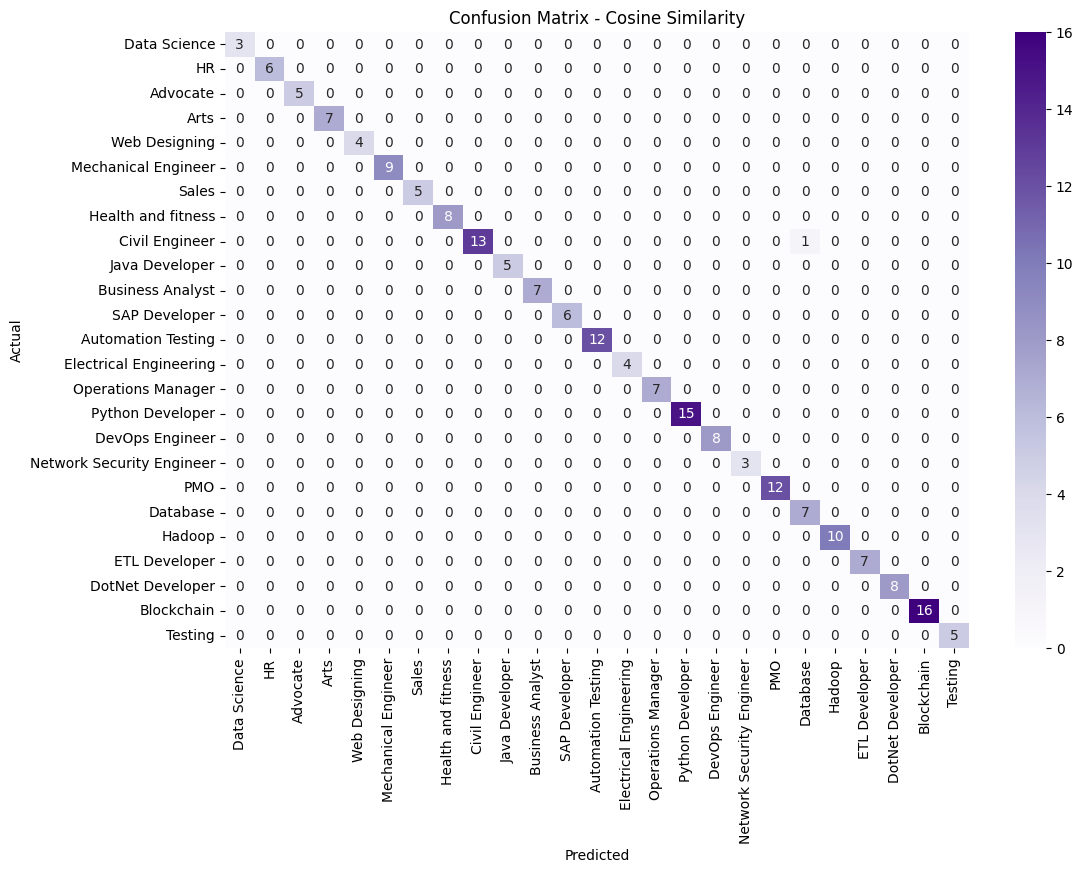

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate cosine similarity between training and test sets
cosine_sim = cosine_similarity(X_test, X_train)

# Find the index of the most similar resume in the training set for each test resume
most_similar_indices = np.argmax(cosine_sim, axis=1)

# Use the category of the most similar resume as the prediction
y_pred_cosine = y_train.iloc[most_similar_indices].values

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cosine)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_cosine))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cosine)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=df['Category'].unique(), yticklabels=df['Category'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Cosine Similarity')
plt.show()


In [59]:
# Example input text
input_text = """Experienced data analyst with a background in big data, machine learning, and Python programming.
Skilled in data visualization using tools like Tableau and Power BI, as well as data wrangling and cleaning with Pandas and NumPy.
Proficient in SQL for querying databases and extracting insights.
Have worked on predictive modeling and statistical analysis to support business decision-making.
Seeking a challenging role as a Data Scientist to further develop my skills in artificial intelligence and machine learning."""

# Transform the input text to the TF-IDF feature space
input_tfidf = vectorizer.transform([input_text])

# Calculate cosine similarity between the input text and the training set
input_cosine_sim = cosine_similarity(input_tfidf, X_train)

# Find the index of the most similar resume in the training set
most_similar_index = np.argmax(input_cosine_sim)

# Use the category of the most similar resume as the prediction
predicted_category = y_train.iloc[most_similar_index]

# Print the predicted category
print(f"Predicted job category for the input text: {predicted_category}")


Predicted job category for the input text: Data Science


DISTIL BERT

In [60]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from transformers import DistilBertTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Text Cleaning
def clean_text(text):
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

df['Resume'] = df['Resume'].apply(clean_text)

# Tokenization using DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_with_huggingface(text):
    tokens = tokenizer.tokenize(text)
    return tokens

df['Tokens_HuggingFace'] = df['Resume'].apply(tokenize_with_huggingface)

# Removal of Stop Words
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df['No_Stop_Words'] = df['Tokens_HuggingFace'].apply(remove_stopwords)

# Lemmatization and Stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

def stem_text(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Lemmatized_Resume'] = df['No_Stop_Words'].apply(lemmatize_text)
df['Stemmed_Resume'] = df['No_Stop_Words'].apply(stem_text)

# Feature Extraction using TF-IDF
df['Processed_Resume'] = df['Lemmatized_Resume'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Resume'])

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zeese\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeese\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zeese\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\zeese\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [61]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertForSequenceClassification, AdamW

# Encode categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

# Define Dataset class
class ResumeDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenization
        inputs = tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=512)

        input_ids = inputs['input_ids'].flatten()
        attention_mask = inputs['attention_mask'].flatten()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
train_dataset = ResumeDataset(df['Resume'].tolist(), df['Category_Encoded'].tolist())
test_dataset = ResumeDataset(df['Resume'].tolist(), df['Category_Encoded'].tolist())

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Load the model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(df['Category'].unique()))

# Training Loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training
for epoch in range(3):  # Number of epochs
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1} finished.")

# Save the model after training
model.save_pretrained('distilbert_resume_classifier')
tokenizer.save_pretrained('distilbert_resume_classifier')


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\zeese\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 finished.
Epoch 2 finished.
Epoch 3 finished.


('distilbert_resume_classifier\\tokenizer_config.json',
 'distilbert_resume_classifier\\special_tokens_map.json',
 'distilbert_resume_classifier\\vocab.txt',
 'distilbert_resume_classifier\\added_tokens.json')

                           precision    recall  f1-score   support

                 Advocate       1.00      0.30      0.46        20
                     Arts       1.00      1.00      1.00        36
       Automation Testing       1.00      0.77      0.87        26
               Blockchain       1.00      1.00      1.00        40
         Business Analyst       1.00      1.00      1.00        28
           Civil Engineer       1.00      1.00      1.00        24
             Data Science       1.00      1.00      1.00        40
                 Database       1.00      1.00      1.00        33
          DevOps Engineer       1.00      1.00      1.00        55
         DotNet Developer       1.00      1.00      1.00        28
            ETL Developer       1.00      1.00      1.00        40
   Electrical Engineering       1.00      1.00      1.00        30
                       HR       0.76      1.00      0.86        44
                   Hadoop       1.00      1.00      1.00     

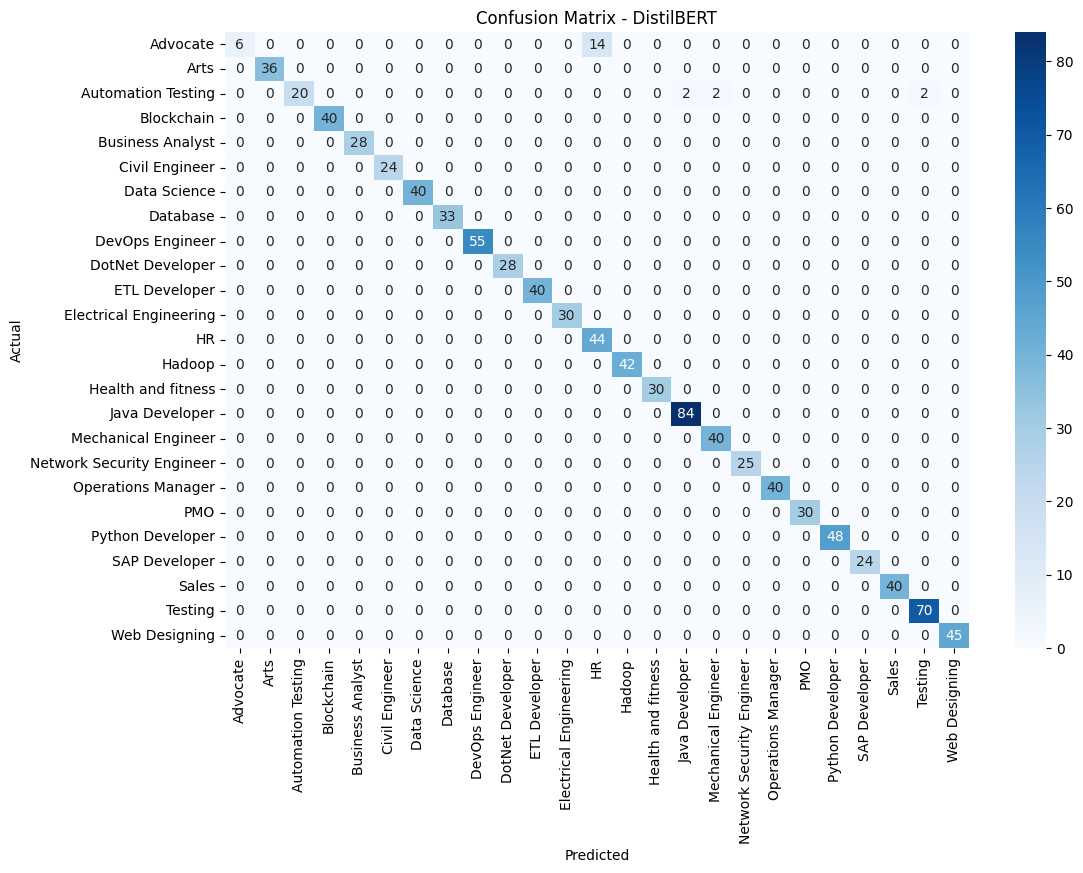

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the saved model
model = DistilBertForSequenceClassification.from_pretrained('distilbert_resume_classifier', num_labels=len(df['Category'].unique()))
model.to(device)

# Evaluation Loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to NumPy arrays for easier analysis
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Print evaluation metrics
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - DistilBERT')
plt.show()


In [67]:
# Example input text
input_text = """Experienced data analyst with a background in big data, machine learning, and Python programming.
Skilled in data visualization using tools like Tableau and Power BI, as well as data wrangling and cleaning with Pandas and NumPy.
Proficient in SQL for querying databases and extracting insights.
Have worked on predictive modeling and statistical analysis to support business decision-making.
Seeking a challenging role as a Data Scientist to further develop my skills in artificial intelligence and machine learning."""

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors='pt', padding='max_length', truncation=True, max_length=512)
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

# Make predictions using the DistilBERT model
model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, axis=1)

# Convert predictions to a more understandable format
predicted_category = label_encoder.inverse_transform(preds.cpu().numpy())

# Print the predicted category
print(f"Predicted job category for the input text: {predicted_category[0]}")


Predicted job category for the input text: Sales
